# Humanoid Model Predictive Control

The following notebook is part of the final project from the course of *<a href="https://scaron.info/robotics-mva/">Robotics</a>* from the master *Mathématiques, Vision et Apprendissage (MVA)* - *ENS Paris Saclay* - France


# Reproduce the formulation and resolution of Model Predictive Control as a QP problem

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import qpsolvers
from scripts.humanoid_mpc import MPCParams
from utils.meshcat_viewer_wrapper import MeshcatVisualizer
import time
from pinocchio import SE3

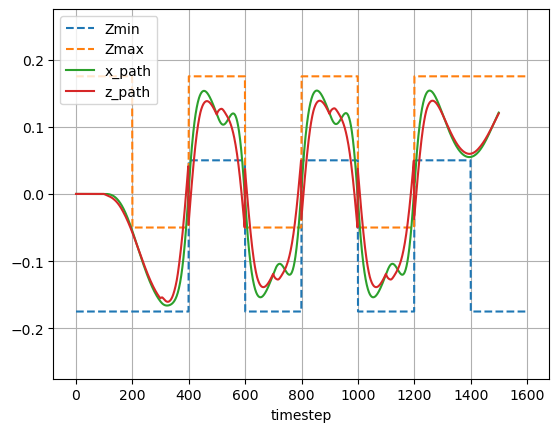

In [40]:
T = 5 * 1e-3
g = 9.87
h_CoM = 0.08
N = 100

mpc = MPCParams(T, N, h_CoM, g, duration=8)
        
Zmin, Zmax = mpc.Zmin, mpc.Zmax
solver = 'daqp'
x_path, z_path, jerks = mpc.solve(Zmin, Zmax, solver) 

plt.plot(Zmin,'--', label= 'Zmin')
plt.plot(Zmax,'--', label="Zmax")
plt.plot(x_path, label="x_path")
plt.plot(z_path, label="z_path")
plt.xlabel('timestep')
plt.ylim(min(Zmin)-0.1, max(Zmax)+0.1)

plt.legend()
plt.grid()

<span style="color:red"> I dont understand why the paper graphs the x is not that noisy. And at end it should be to a stable x or z position? I believe the peaks on Z are produced for the rapid change of the Zlimits</span>.


## Comparing Different solvers:


daqp
ecos


c:\Users\tania\miniconda3\envs\robotics-project\lib\site-packages\qpsolvers\solvers\ecos_.py:164: UserWarning: ECOS returned exit flag 10 (INACC_OFFSET: inaccurate results)
  warnings.warn(f"ECOS returned exit flag {flag} ({meaning})")
c:\Users\tania\miniconda3\envs\robotics-project\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
c:\Users\tania\miniconda3\envs\robotics-project\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


osqp


c:\Users\tania\miniconda3\envs\robotics-project\lib\site-packages\qpsolvers\solvers\osqp_.py:161: UserWarning: OSQP exited with status 'primal infeasible'
  warnings.warn(f"OSQP exited with status '{res.info.status}'")


quadprog
scs


c:\Users\tania\miniconda3\envs\robotics-project\lib\site-packages\qpsolvers\solvers\scs_.py:193: UserWarning: SCS returned 2: SOLVED_INACCURATE
  warnings.warn(


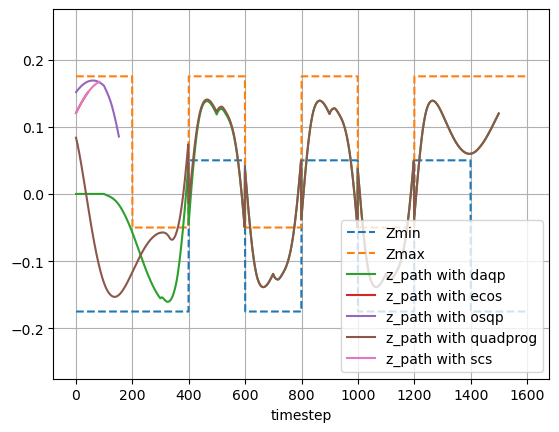

In [39]:
mpc = MPCParams(T, N, h_CoM, g, duration=8)
        
Zmin, Zmax = mpc.Zmin, mpc.Zmax
plt.plot(Zmin,'--', label= 'Zmin')
plt.plot(Zmax,'--', label="Zmax")
sparse=True
for solver in qpsolvers.available_solvers:
    print(solver)
    x_path, z_path, jerks = mpc.solve(Zmin, Zmax, solver) 
    plt.plot(z_path, label=f"z_path with {solver}")
    plt.xlabel('timestep')
    plt.ylim(min(Zmin)-0.1, max(Zmax)+0.1)

    plt.legend()
    plt.grid()

## Sphere Visualization

In [35]:
viz = MeshcatVisualizer()
viz.addSphere('CoM', radius=.01, color='red')

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7003/static/


In [36]:
for x_CoM in x_path:
    displacement = SE3(np.eye(3), np.array([0, 0, x_CoM]))
    viz.applyConfiguration('CoM', displacement)
    time.sleep(T)


<span style="color:red"> It would be interesting to add  a movement in the x axis to give the impresion of moving. The problem that is not linear it should be with kind of a curve....</span>.
